<img src="https://news.illinois.edu/files/6367/543635/116641.jpg" alt="University of Illinois" width="250"/>

# Project 22: UIUC GPA

## Team Members
* Yiping Li - [yipingl4@illinois.edu](mailto:yipingl4@illinois.edu)
* Leo Yang - [junjiey3@illinois.edu](mailto:junjiey3@illinois.edu)
* Shijie Sun - [shijies5@illinois.edu](mailto:shijies5@illinois.edu)
* Richwell Perez - [richwell@illinois.edu](mailto:richwell@illinois.edu)

## Problem Summary
The purpose of this project is to implement deep learning concepts and 
techniques on a real dataset: UIUC GPA. The general questions that will require the application of deep learning is predicting the GPA/grade distribution of UIUC courses in the future. The project will provide some visualization of the data and descriptive statistics, implement linear or logistic regression, and recurrent neural networks.

## License
Dataset is obtained from Professor Ulmschneider's uiuc-gpa-dataset. Project 
curated by Jared Canty (Summer 2022 Blackwell Program). All rights are reserved.


Dataset on UIUC GPA is available at
https://github.com/wadefagen/datasets/tree/master/gpa (“uiuc-gpa-dataset.csv”)



In [ ]:
import numpy as np
import pandas as pd
import time
import random
import matplotlib
#%matplotlib notebook
import matplotlib.pyplot as plt
import scipy.stats
import matplotlib.offsetbox as offsetbox
from matplotlib.ticker import StrMethodFormatter
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import copy

In [ ]:
#for some reason, this needs to be in a separate cell
params={
    "font.size":15,
    "lines.linewidth":5,
}
plt.rcParams.update(params)

##**10/30 Milestone:**##

###**Dataset to pandas**

In [ ]:
file_url = "https://raw.githubusercontent.com/wadefagen/datasets/master/gpa/uiuc-gpa-dataset.csv"

In [ ]:
gpa_data = pd.read_csv(file_url, header=0)
gpa_data

,Year,Term,YearTerm,Subject,Number,Course Title,Sched Type,A+,A,A-,...,B-,C+,C,C-,D+,D,D-,F,W,Primary Instructor
0,2022,Spring,2022-sp,AAS,100,Intro Asian American Studies,LCD,6,13,0,...,1,0,3,0,1,1,0,0,0,"Lee, Sang S"
1,2022,Spring,2022-sp,AAS,100,Intro Asian American Studies,DIS,0,11,5,...,2,1,0,1,1,0,0,0,0,"Zheng, Reanne"
2,2022,Spring,2022-sp,AAS,100,Intro Asian American Studies,DIS,0,10,7,...,1,0,0,0,0,0,0,2,0,"Zheng, Reanne"
3,2022,Spring,2022-sp,AAS,100,Intro Asian American Studies,DIS,17,8,1,...,0,0,0,0,0,0,0,0,0,"Rosado-Torres, Alexander"
4,2022,Spring,2022-sp,AAS,100,Intro Asian American Studies,OD,0,8,4,...,2,1,0,0,0,0,1,3,1,"Wang, Yu"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64043,2010,Summer,2010-su,STAT,410,Statistics and Probability II,LEC,5,10,2,...,1,0,1,3,0,0,0,2,1,"Stepanov, Alexei G"
64044,2010,Summer,2010-su,STAT,440,Statistical Data Management,LEC,4,12,8,...,0,0,0,0,0,0,0,0,0,"Unger, David"
64045,2010,Summer,2010-su,TAM,212,Introductory Dynamics,LEC,0,1,3,...,7,5,1,1,0,2,0,1,0,"Morgan, William T"
64046,2010,Summer,2010-su,TAM,251,Introductory Solid Mechanics,LCD,1,2,2,...,0,3,3,2,0,0,1,1,0,"Ott-Monsivais, Stephanie"


In [ ]:
gpa_scale = {
  'A+' : 4.0,
  'A' : 4.0,
  'A-' : 3.67,
  'B+' : 3.33,
  'B' : 3.0,
  'B-' : 2.67,
  'C+' : 2.33,
  'C' : 2.0,
  'C-' : 1.67,
  'D+' : 1.33,
  'D' : 1.0,
  'D-' : 0.67,
  'F' : 0.0,
} # defined from https://registrar.illinois.edu/courses-grades/explanation-of-grades/

letterGrades = list(gpa_scale.keys())
gpa_data['Students_Completed'] = gpa_data[letterGrades].sum(axis=1) # Student pop. per class without W

for l in gpa_scale:
  gpa_data[l + 'asNum'] = gpa_data[l] * gpa_scale[l]

newLetterGrades = [l + 'asNum' for l in letterGrades]
gpa_data['GPA'] = gpa_data[newLetterGrades].sum(axis=1) / gpa_data['Students_Completed'] # Label

letterGrades.append('W')
gpa_data['Students'] = gpa_data[letterGrades].sum(axis=1) # Student pop. per class including with W

gpa_data

,Year,Term,YearTerm,Subject,Number,Course Title,Sched Type,A+,A,A-,...,B-asNum,C+asNum,CasNum,C-asNum,D+asNum,DasNum,D-asNum,FasNum,GPA,Students
0,2022,Spring,2022-sp,AAS,100,Intro Asian American Studies,LCD,6,13,0,...,2.67,0.00,6.0,0.00,1.33,1.0,0.00,0.0,3.413793,29
1,2022,Spring,2022-sp,AAS,100,Intro Asian American Studies,DIS,0,11,5,...,5.34,2.33,0.0,1.67,1.33,0.0,0.00,0.0,3.440400,25
2,2022,Spring,2022-sp,AAS,100,Intro Asian American Studies,DIS,0,10,7,...,2.67,0.00,0.0,0.00,0.00,0.0,0.00,0.0,3.358519,27
3,2022,Spring,2022-sp,AAS,100,Intro Asian American Studies,DIS,17,8,1,...,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,3.928571,28
4,2022,Spring,2022-sp,AAS,100,Intro Asian American Studies,OD,0,8,4,...,5.34,2.33,0.0,0.00,0.00,0.0,0.67,0.0,2.921429,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64043,2010,Summer,2010-su,STAT,410,Statistics and Probability II,LEC,5,10,2,...,2.67,0.00,2.0,5.01,0.00,0.0,0.00,0.0,3.183226,32
64044,2010,Summer,2010-su,STAT,440,Statistical Data Management,LEC,4,12,8,...,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,3.774643,28
64045,2010,Summer,2010-su,TAM,212,Introductory Dynamics,LEC,0,1,3,...,18.69,11.65,2.0,1.67,0.00,2.0,0.00,0.0,2.595714,28
64046,2010,Summer,2010-su,TAM,251,Introductory Solid Mechanics,LCD,1,2,2,...,0.00,6.99,6.0,3.34,0.00,0.0,0.67,0.0,2.603333,21


In [ ]:
gpa_data['GPA']

0        3.413793
1        3.440400
2        3.358519
3        3.928571
4        2.921429
           ...   
64043    3.183226
64044    3.774643
64045    2.595714
64046    2.603333
64047    3.205641
Name: GPA, Length: 64048, dtype: float64

In [ ]:
gpa_data.columns

Index(['Year', 'Term', 'YearTerm', 'Subject', 'Number', 'Course Title',
       'Sched Type', 'A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+',
       'D', 'D-', 'F', 'W', 'Primary Instructor', 'Students_Completed',
       'A+asNum', 'AasNum', 'A-asNum', 'B+asNum', 'BasNum', 'B-asNum',
       'C+asNum', 'CasNum', 'C-asNum', 'D+asNum', 'DasNum', 'D-asNum',
       'FasNum', 'GPA', 'Students'],
      dtype='object')

In [ ]:
# drop unused columns
gpa_data = gpa_data.drop(columns=newLetterGrades)
gpa_data = gpa_data.drop(columns=['YearTerm', 'Sched Type', 'Students_Completed']) # keeping number of W's for reversable computation

In [ ]:
gpa_data.columns

Index(['Year', 'Term', 'Subject', 'Number', 'Course Title', 'A+', 'A', 'A-',
       'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'D-', 'F', 'W',
       'Primary Instructor', 'GPA', 'Students'],
      dtype='object')

In [ ]:
gpa_data = gpa_data.reindex(columns=['Term', 'Year', 'Students', 'Subject', 'Number', 'A+', 'A', 'A-',
       'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'D-', 'F', 'W', 'Course Title',
       'Primary Instructor', 'GPA'])

In [ ]:
gpa_data

,Term,Year,Students,Subject,Number,A+,A,A-,B+,B,...,C,C-,D+,D,D-,F,W,Course Title,Primary Instructor,GPA
0,Spring,2022,29,AAS,100,6,13,0,0,4,...,3,0,1,1,0,0,0,Intro Asian American Studies,"Lee, Sang S",3.413793
1,Spring,2022,25,AAS,100,0,11,5,3,1,...,0,1,1,0,0,0,0,Intro Asian American Studies,"Zheng, Reanne",3.440400
2,Spring,2022,27,AAS,100,0,10,7,4,3,...,0,0,0,0,0,2,0,Intro Asian American Studies,"Zheng, Reanne",3.358519
3,Spring,2022,28,AAS,100,17,8,1,1,1,...,0,0,0,0,0,0,0,Intro Asian American Studies,"Rosado-Torres, Alexander",3.928571
4,Spring,2022,22,AAS,100,0,8,4,1,1,...,0,0,0,0,1,3,1,Intro Asian American Studies,"Wang, Yu",2.921429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64043,Summer,2010,32,STAT,410,5,10,2,2,5,...,1,3,0,0,0,2,1,Statistics and Probability II,"Stepanov, Alexei G",3.183226
64044,Summer,2010,28,STAT,440,4,12,8,1,3,...,0,0,0,0,0,0,0,Statistical Data Management,"Unger, David",3.774643
64045,Summer,2010,28,TAM,212,0,1,3,2,5,...,1,1,0,2,0,1,0,Introductory Dynamics,"Morgan, William T",2.595714
64046,Summer,2010,21,TAM,251,1,2,2,1,5,...,3,2,0,0,1,1,0,Introductory Solid Mechanics,"Ott-Monsivais, Stephanie",2.603333


In [ ]:
subject = gpa_data['Subject'].unique()
len(subject)

170

In [ ]:
course = gpa_data['Course Title'].unique()
len(course)

5574

In [ ]:
instructor = gpa_data['Primary Instructor'].unique()
len(instructor)

8867

##**11/20 Milestone:**

In [ ]:
# drop columns containing NaN
letterGrades.append('GPA')
print(letterGrades)
gpa_data = gpa_data.dropna().reset_index(drop=True)
display(gpa_data)

['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'D-', 'F', 'W', 'GPA']


,Term,Year,Students,Subject,Number,A+,A,A-,B+,B,...,C,C-,D+,D,D-,F,W,Course Title,Primary Instructor,GPA
0,Spring,2022,29,AAS,100,6,13,0,0,4,...,3,0,1,1,0,0,0,Intro Asian American Studies,"Lee, Sang S",3.413793
1,Spring,2022,25,AAS,100,0,11,5,3,1,...,0,1,1,0,0,0,0,Intro Asian American Studies,"Zheng, Reanne",3.440400
2,Spring,2022,27,AAS,100,0,10,7,4,3,...,0,0,0,0,0,2,0,Intro Asian American Studies,"Zheng, Reanne",3.358519
3,Spring,2022,28,AAS,100,17,8,1,1,1,...,0,0,0,0,0,0,0,Intro Asian American Studies,"Rosado-Torres, Alexander",3.928571
4,Spring,2022,22,AAS,100,0,8,4,1,1,...,0,0,0,0,1,3,1,Intro Asian American Studies,"Wang, Yu",2.921429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63867,Summer,2010,32,STAT,410,5,10,2,2,5,...,1,3,0,0,0,2,1,Statistics and Probability II,"Stepanov, Alexei G",3.183226
63868,Summer,2010,28,STAT,440,4,12,8,1,3,...,0,0,0,0,0,0,0,Statistical Data Management,"Unger, David",3.774643
63869,Summer,2010,28,TAM,212,0,1,3,2,5,...,1,1,0,2,0,1,0,Introductory Dynamics,"Morgan, William T",2.595714
63870,Summer,2010,21,TAM,251,1,2,2,1,5,...,3,2,0,0,1,1,0,Introductory Solid Mechanics,"Ott-Monsivais, Stephanie",2.603333


In [ ]:
term = gpa_data['Term'].unique()
print(len(term))
subject = gpa_data['Subject'].unique()
print(len(subject))
course = gpa_data['Course Title'].unique()
print(len(course))
instructor = gpa_data['Primary Instructor'].unique()
print(len(instructor))

4
170
5570
8866


###**Dataset Statistics**

In [ ]:
stats_df = gpa_data.describe()
stats_df

,Year,Students,Number,A+,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,F,W,GPA
count,63872.000000,63872.000000,63872.000000,63872.000000,63872.000000,63872.000000,63872.000000,63872.000000,63872.000000,63872.000000,63872.000000,63872.000000,63872.000000,63872.000000,63872.000000,63872.000000,63872.000000,63872.000000
mean,2015.627442,58.674458,292.739573,6.844220,18.315318,7.595973,5.915237,7.471709,3.221333,2.172517,2.750016,1.182427,0.605633,0.832164,0.365653,1.171343,0.230915,3.360036
std,3.678076,77.832904,155.982661,21.780682,32.865714,11.372791,8.604748,11.643533,5.747760,4.731030,5.998893,3.080703,1.881547,2.128156,1.297101,2.773861,0.683139,0.398904
min,2010.000000,21.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.140385
25%,2012.000000,26.000000,131.000000,0.000000,6.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.106378
50%,2016.000000,34.000000,270.000000,2.000000,11.000000,5.000000,4.000000,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.414400
75%,2019.000000,55.000000,423.000000,7.000000,20.000000,9.000000,7.000000,8.000000,4.000000,2.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,3.675000
max,2022.000000,1875.000000,798.000000,929.000000,1034.000000,300.000000,210.000000,250.000000,144.000000,138.000000,111.000000,66.000000,45.000000,61.000000,29.000000,75.000000,16.000000,3.995350


###**Dataset Visualization**

####**Histogram of student population per class**

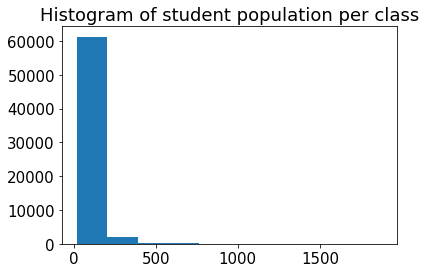

In [ ]:
x = gpa_data['Students']
plt.hist(x)
plt.title('Histogram of student population per class')
plt.show()

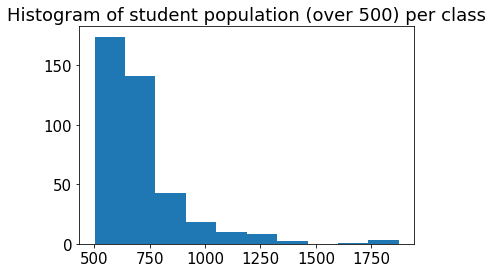

In [ ]:
x = gpa_data['Students']
plt.hist(x[x>500])
plt.title('Histogram of student population (over 500) per class')
plt.show()

####**Histogram of Average GPA**

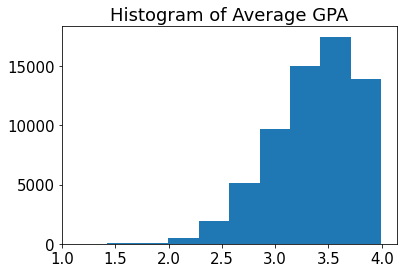

In [ ]:
x = gpa_data['GPA']
plt.hist(x)
plt.title('Histogram of Average GPA')
plt.show()

####**Average GPA vs Student population per class**

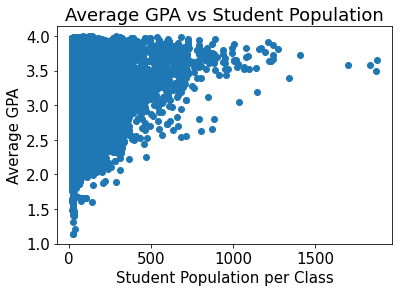

In [ ]:
x = gpa_data['Students']
y = gpa_data['GPA']
plt.xlabel('Student Population per Class')
plt.ylabel('Average GPA')
plt.title('Average GPA vs Student Population')
plt.scatter(x, y)
plt.show()

####**Average GPA vs Course Number**

In [ ]:
# display courses with wierd course numbers
x = gpa_data['Number']
display(gpa_data[x>600])
display(gpa_data[x<100])

,Term,Year,Students,Subject,Number,A+,A,A-,B+,B,...,C,C-,D+,D,D-,F,W,Course Title,Primary Instructor,GPA
1489,Spring,2022,68,LAW,602,1,4,10,28,14,...,2,1,0,0,0,0,0,Property,"Sherkow, Jacob S",3.205147
1490,Spring,2022,67,LAW,603,1,8,3,24,17,...,0,0,0,0,0,0,0,Torts,"Wexler, Lesley M",3.183134
1491,Spring,2022,70,LAW,604,1,7,6,29,12,...,1,0,0,0,0,0,0,Criminal Law,"Moore, Michael",3.199000
1492,Spring,2022,68,LAW,606,0,2,12,24,16,...,0,0,0,0,0,0,0,Constitutional Law I,"Amar, Vikram D",3.166176
1493,Spring,2022,70,LAW,606,0,3,11,29,16,...,0,0,0,0,0,0,0,Constitutional Law I,"Mazzone, Jason",3.199000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63674,Spring,2010,99,VCM,654,0,44,0,0,46,...,9,0,0,0,0,0,0,Special Small Animal Surgery,"Griffon, Dominique",3.353535
63675,Spring,2010,84,VCM,655,0,17,0,0,49,...,16,0,0,2,0,0,0,Special Large Animal Surgery,"Stewart, Allison A",2.964286
63676,Spring,2010,115,VCM,667,0,34,0,0,50,...,27,0,0,3,0,1,0,Radiology and Radiobiology,"O'Brien, Robert T",2.982609
63677,Spring,2010,118,VM,603,0,22,0,0,60,...,34,0,0,2,0,0,0,Structure and Function II,"Yao, Hung-Chang H",2.864407


,Term,Year,Students,Subject,Number,A+,A,A-,B+,B,...,C,C-,D+,D,D-,F,W,Course Title,Primary Instructor,GPA
24301,Fall,2017,27,MATH,2,0,1,4,3,3,...,2,1,1,2,0,1,4,Introductory Algebra,"Johnson, Rebecca L",2.565217
29445,Fall,2016,26,MATH,2,2,1,3,4,0,...,1,2,0,1,2,5,2,Introductory Algebra,"Johnson, Rebecca L",2.167500
39466,Fall,2014,22,MATH,12,2,7,4,4,3,...,1,0,0,0,0,0,1,Algebra,"Folwaczny, Lena C",3.571429
39467,Fall,2014,111,MATH,12,6,2,6,8,16,...,7,3,5,4,5,16,1,Algebra,"Reddy, Alison",2.190818
44464,Fall,2013,34,MATH,2,0,0,0,0,0,...,10,5,3,3,2,5,3,Introductory Algebra,"Aydin-Mullen, Yelda",1.430645
44465,Fall,2013,25,MATH,12,0,0,0,4,0,...,3,3,0,2,0,1,3,Algebra,"DiPasquale, Michael R",2.258182
44466,Fall,2013,158,MATH,12,3,7,5,14,24,...,22,11,6,8,7,18,5,Algebra,"Reddy, Alison",2.163595
49421,Fall,2012,28,MATH,2,1,2,0,4,1,...,2,4,2,1,0,4,1,Introductory Algebra,"Aydin-Mullen, Yelda",2.135556
49422,Fall,2012,164,MATH,12,3,5,18,20,10,...,13,13,7,5,6,27,2,Algebra,"Reddy, Alison",2.154630
52454,Fall,2011,27,MATH,2,1,4,4,6,3,...,1,0,1,0,0,0,0,Introductory Algebra,"Hunte, Andrew A",3.148148


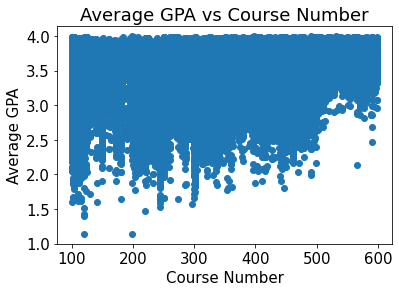

In [ ]:
x = gpa_data['Number']
y = gpa_data['GPA']
y = y[x < 600]
x = x[x < 600]
y = y[x > 100]
x = x[x > 100]
plt.scatter(x, y)
plt.xlabel('Course Number')
plt.ylabel('Average GPA')
plt.title('Average GPA vs Course Number')
plt.show()

####**How many courses each professor teaches**

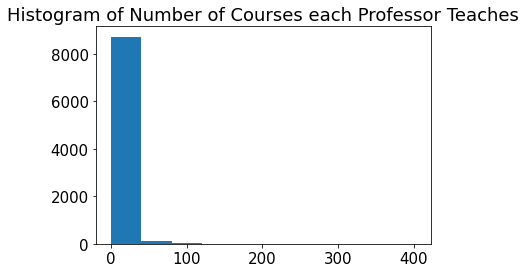

In [ ]:
instructors = dict()
idx = dict()
for i in range(len(gpa_data)):
  instructor = gpa_data['Primary Instructor'][i]
  if instructor in instructors.keys():
    instructors[instructor] += 1
  else:
    instructors[instructor] = 0
instructors = dict(sorted(instructors.items(), key=lambda item: item[1]))
# instructor = list(instructors.keys())[-10]
# print(instructor)
# tmp = gpa_data[gpa_data['Primary Instructor'] == instructor]
# display(tmp)
# stats_df = tmp.describe()
# display(stats_df)
x = np.asarray(list(instructors.values()))
plt.hist(x)
plt.title('Histogram of Number of Courses each Professor Teaches')
plt.show()

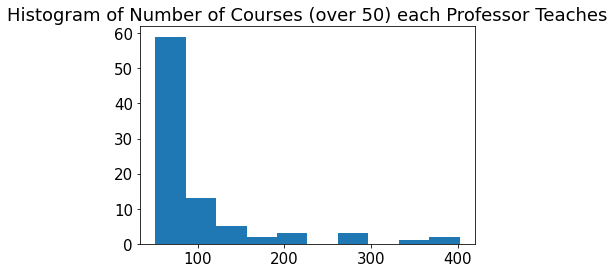

In [ ]:
x = np.asarray(list(instructors.values()))
plt.hist(x[x > 50])
plt.title('Histogram of Number of Courses (over 50) each Professor Teaches')
plt.show()

###**Linear Regression on Average GPA/Any Letter Grade**

**Label:**
* GPA (Overall GPA Per Class/Class Section)

or 
* Any Letter Grade (number of students who get A+, A-, A, B+, etc.)

**Features:**
* Term (one-hot)
* Year
* Students (Student pop. per class)
* Subject / Department (one-Hot)
* (Course) Number

**Features not included in Linear Regression:**
* Course Title (One-Hot)
  * too large feature space for linear regression
* Primary Instructor (One-Hot)
  * too large feature space for linear regression

In [ ]:
def run_linear_regression(label, gpa_data, letterGrades): # set any element in letterGrades as the label we want to predict
  label_name = label
  if label == 'GPA':
    label_name = 'average GPA'
  print('Running Linear Regression on {}'.format(label_name))

  l = copy.deepcopy(letterGrades)
  l.remove(label)
  # convert to one-hot coding
  # there are too many course titles and instructors for efficient linear regression so we drop them
  new_gpa_data = pd.get_dummies(gpa_data, columns=['Term', 'Subject']).drop(columns=['Primary Instructor', 'Course Title']).drop(columns=l)
  # display(new_gpa_data)

  sample_data = new_gpa_data[:]
    
  Y = sample_data[label]
  X = sample_data.drop(columns=[label])

  x_train, X1, y_train, Y1 = train_test_split(X, Y, test_size = 0.3, random_state = 42)
  x_valid, x_test, y_valid, y_test = train_test_split(X1, Y1, test_size = 0.5, random_state = 42)

  LR = LinearRegression()
  LR.fit(x_train,y_train)

  y_pred =  LR.predict(x_test)

  score = r2_score(y_test, y_pred)
  print('R2 Score: ',score)
  print('Mean Squared Error: ',mean_squared_error(y_test, y_pred))

  print('First five testing data points:')
  print('labels: ', np.asarray(y_test[:5]))
  print('predictions: ', y_pred[:5])

In [ ]:
for letterGrade in letterGrades:
  run_linear_regression(letterGrade, gpa_data, letterGrades)
  print('')

Running Linear Regression on A+
R2 Score:  0.3802483618485113
Mean Squared Error:  319.8639337998315
First five testing data points:
labels:  [ 8  0 20  0  5]
predictions:  [-1.48769379 15.07601929 -1.23236084 -0.15962219  2.15894318]

Running Linear Regression on A
R2 Score:  0.6613107682019902
Mean Squared Error:  377.6020717358289
First five testing data points:
labels:  [ 8 89  8 11 19]
predictions:  [ 6.23915482 47.87810135 19.52135086  8.42802048 11.08820343]

Running Linear Regression on A-
R2 Score:  0.6330679149444889
Mean Squared Error:  55.07581770765853
First five testing data points:
labels:  [5 0 3 3 9]
predictions:  [ 5.48887014 11.6790514   1.89523315  6.34607697  7.99831343]

Running Linear Regression on B+
R2 Score:  0.6140347178828113
Mean Squared Error:  33.32392456893585
First five testing data points:
labels:  [3 0 1 5 3]
predictions:  [4.07558823 7.75710487 1.27511215 4.85163307 5.29135132]

Running Linear Regression on B
R2 Score:  0.6260534568742685
Mean Square

##**11/29 Milestone:**

In [ ]:
from google.colab import drive
from matplotlib import pyplot as plt
from google.colab import auth

import os
import numpy as np  
import re, time
import tensorflow as tf
import random
import math
from tensorflow import keras

import argparse
import pandas as pd

from glob import glob
from tqdm import tqdm
from keras import backend as K

import tensorflow as tf
from tensorflow import keras
from keras import models
from keras.layers import Conv3D, MaxPool3D, Dense, Flatten, UpSampling3D, BatchNormalization
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

%pip install tensorflow-addons
from tensorflow_addons.metrics import RSquare

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/



###**Enable GPU**

In [ ]:
enable_gpu = True

%tensorflow_version 2.x
import tensorflow as tf

if enable_gpu:
  device_name = tf.test.gpu_device_name()
  if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
  print('Found GPU at: {}'.format(device_name))
  gpu_info = !nvidia-smi
  gpu_info = '\n'.join(gpu_info)
  if gpu_info.find('failed') >= 0:
    print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
    print('and then re-execute this cell.')
  else:
    print(gpu_info)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Found GPU at: /device:GPU:0
Tue Nov 29 17:51:37 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P0    30W /  70W |    312MiB / 15109MiB |      4%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+-------------

###**Deep Learning Model**

Label: 
* average GPA or Any Letter Grade (number of students who get A+, A-, A, B+, etc.)

Features:
* Term (one-hot)
* Year
* Students (Student pop. per class)
* Subject / Department (one-Hot)
* (Course) Number
* Course Title (one-Hot)
* Primary Instructor (one-Hot)

Run with GPU:
* change Runtime Type to 'Standard GPU + High RAM'

Loss function:
* Mean absolute Error

Metric:
* R2 Score

In [ ]:
def create_model():
  model = models.Sequential()

  model.add(Dense(256, activation='relu'))
  model.add(Dense(256, activation='relu'))

  model.add(Dense(1))

  model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=[RSquare()])

  return model

In [ ]:
def run_regression(label, gpa_data, letterGrades, enable_gpu): # set any element in letterGrades as the label we want to predict
  label_name = label
  if label == 'GPA':
    label_name = 'average GPA'
  print('Running Regression on {}'.format(label_name))

  l = copy.deepcopy(letterGrades)
  l.remove(label)
  # convert to one-hot coding
  new_gpa_data = pd.get_dummies(gpa_data, columns=['Term', 'Subject', 'Course Title', 'Primary Instructor']).drop(columns=l)
  # display(new_gpa_data)

  sample_data = new_gpa_data[:]

  Y = sample_data[label]
  X = sample_data.drop(columns=[label])

  # train : valid : test = 0.7 : 0.15 : 0.15
  x_train, X1, y_train, Y1 = train_test_split(X, Y, test_size = 0.3, random_state = 42)
  x_valid, x_test, y_valid, y_test = train_test_split(X1, Y1, test_size = 0.5, random_state = 42)
  
  if enable_gpu:
    with tf.device('/device:GPU:0'):
      model = create_model()
  else:
    model = create_model()

  checkpoint_filepath = '/tmp/checkpoint.h5'

  model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_r_square', 
    mode='max',
    save_best_only=True,
    save_weights_only=True)

  history = model.fit(x_train, y_train,
                  validation_data=(x_valid, y_valid),
                  epochs=50,
                  batch_size=64,
                  callbacks=[model_checkpoint_callback])
  
  model.load_weights(checkpoint_filepath)

  print('\nTesting set:')
  test_loss, test_metric = model.evaluate(x_test, y_test)

  sample_test = x_test[:5]
  y_pred = model.predict(sample_test)
  print('\nFirst five testing data points:')
  print('labels: ', np.asarray(y_test[:5]))
  print('predictions: ', y_pred[:5])

  print('\nmodel summary: ')
  model.summary()

In [ ]:
run_regression('GPA', gpa_data, letterGrades, enable_gpu)

Running Regression on average GPA
Epoch 1/50
699/699 [==============================] - 8s 9ms/step - loss: 3.8116 - r_square: -22.9239 - val_loss: 0.0753 - val_r_square: 0.5095
Epoch 2/50
699/699 [==============================] - 5s 7ms/step - loss: 0.0861 - r_square: 0.4594 - val_loss: 0.9677 - val_r_square: -5.2993
Epoch 3/50
699/699 [==============================] - 5s 7ms/step - loss: 0.1772 - r_square: -0.1123 - val_loss: 0.2182 - val_r_square: -0.4207
Epoch 4/50
699/699 [==============================] - 5s 7ms/step - loss: 0.1528 - r_square: 0.0409 - val_loss: 0.1862 - val_r_square: -0.2119
Epoch 5/50
699/699 [==============================] - 5s 7ms/step - loss: 0.1456 - r_square: 0.0859 - val_loss: 0.1458 - val_r_square: 0.0507
Epoch 6/50
699/699 [==============================] - 5s 7ms/step - loss: 0.1159 - r_square: 0.2724 - val_loss: 0.0608 - val_r_square: 0.6039
Epoch 7/50
699/699 [==============================] - 5s 7ms/step - loss: 0.0917 - r_square: 0.4246 - val_lo

###**Mini-batch Learning**

Larger batch sizes yield faster training speed per epoch, but models with smaller batch sizes learn faster as parameters are updated more frequently. Also, larger batch sizes take up more memory.

We found that training with a batch size of 64 for 50 epochs produces satisfactory results. Smaller batch sizes (e.g. 32) require much longer time to train but do not yield better results.

###**Optimizers**

We have tried several optimizers, including SGD, Adam, Adagrad, Nadam, and RMSprop. 
SGD causes exploding gradients. 
Among them Adam yields the best results.

###**Hyperparameters**

We ran the model to predict the average GPA of each class given its feature space and got the following parameters after tuning:

* Train-valid-test split ratio: 0.7 : 0.15 : 0.15

* Optimizer: Adam

* Initial learning rate: 0.001

* Layers: input(input_size)->Dense(256)->Dense(256)->ouput(1)

* Activation function: ReLu

* Loss Function: Mean absolute error (MAE) and Mean squared error (MSE) had similar performances

* Epochs: 50

* Batch size: 64

Comparison with benchmark (on average GPA prediction):

* Our Model: MSE = 0.0562, R2 Score = 0.6563 
* Benchmark (Linear Regression): MSE = 0.1127, R2 Score: 0.3108